# Twitter is upset because of too many API calls one after another...

In [9]:
import requests
from requests_oauthlib import OAuth1
import json
from details import *

import pickle

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

V1=nx.Graph()

url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1(item1, item2, item3, item4)
requests.get(url, auth=auth)

twitterprofile = ['ReactLondon_']

allfollowers = []

for eachprofile in twitterprofile:
    initialrequest = requests.get('https://api.twitter.com/1.1/followers/list.json?cursor=-1&screen_name='+eachprofile+'&skip_status=true&include_user_entities=false&count=200', auth=auth)
    for eachtuser in initialrequest.json()['users']:
        V1.add_edge(eachprofile,eachtuser['screen_name'])
        allfollowers.append(eachtuser['screen_name'])
    while initialrequest.json()['next_cursor'] != 0:
        initialrequest = requests.get('https://api.twitter.com/1.1/followers/list.json?cursor='+initialrequest.json()['next_cursor_str']+'&screen_name='+eachprofile+'&skip_status=true&include_user_entities=false&count=200', auth=auth)
        for eachtuser in initialrequest.json()['users']:
            V1.add_edge(eachprofile,eachtuser['screen_name'])
            allfollowers.append(eachtuser['screen_name'])
    pickle.dump( allfollowers, open( eachprofile+".p", "wb" ) )
        
nx.draw(V1,with_labels=True,node_size=30,font_size=5)
plt.figure(figsize=(50,50))
plt.show() # display
nx.info(V1)

KeyError: 'users'

# Testing to make sure the pickle has worked!

In [5]:
import pickle
savedfollowers = pickle.load( open( "react_native_eu.p", "rb" ) )
print savedfollowers

[u'ReactDOM', u'pranavlathigara', u'YouTapia', u'KimberleyPoba', u'BadooTech', u'DevloperPips', u'reactres', u'StudentofJS', u'hoangnamhai', u'RheaVenturi', u'reactdayberlin', u'Esedjo', u'6YUUZrjd', u'mikerazzmatazz', u'Pvalsfr', u'tmvvr', u'carlosrossonero', u'raphh', u'mahmoud_alsati', u'Adrien0', u'_agtlucas', u'fuechsina', u'_shedev', u'darkfrontcode', u'ken_wheeler', u'ookla1977', u'SantalJohnson', u'keyan12', u'richmcm', u'Juliekyi1', u'AllsetBu', u'glabcn', u'fil_ter', u'msbrandymorgan', u'minderaswcraft', u'mr_eddieee', u'psarakism', u'reactnativeedu', u'fabiobluiz', u'BradPillow', u'barankucukguzel', u'KarimFillal', u'p3drosola', u'DRAWNDdown', u'it3krakow', u'DavidReveillon', u'gershon77', u'jedatron', u'furzeface', u'Dropclusive', u'naoufal', u'gregbarborini', u'hmily_jenny', u'montooshah', u'musomatt', u'callirgos01', u'OzgurAlen', u'twlanas92', u'ismga', u'magyarsrac', u'jerolimov', u'szmidku', u'jgautheron', u'DavidNiembro', u'TussQuss', u'LeonJerinic', u'michelmongkhoy'

# Loading the followers for each profile from created pickles
To save the gathered data and prevent repeated API calls, I am storing the information as a pickle -> too lazy to set up a database.

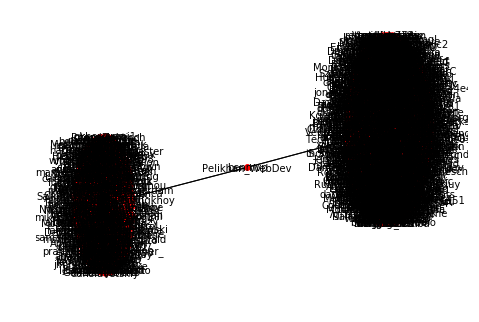

'Name: \nType: Graph\nNumber of nodes: 1164\nNumber of edges: 1164\nAverage degree:   2.0000'

In [11]:
V2=nx.Graph()

targets = ['react_native_eu','WeAreDevs']
for eachtarget in targets:
    savedfollowers = pickle.load( open( eachtarget+".p", "rb" ) )
    for eachname in savedfollowers:
        V2.add_edge(eachtarget,eachname)
        
nx.draw(V2,with_labels=True,node_size=30,font_size=10)
plt.figure(figsize=(50,50))
plt.show() # display
nx.info(V2)
    

# Identifying the profiles shared by 2 accounts

In [13]:
for path in nx.all_simple_paths(V2, source='react_native_eu', target='WeAreDevs'):
    print(path)

['react_native_eu', u'Pelikhan_WebDev', 'WeAreDevs']
['react_native_eu', u'benmvp', 'WeAreDevs']
